In [2]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [15]:
m = np.arange(12).reshape((3,4))
#print(m)

print(m.sum()/12)
print(m.sum(axis=0)/3)
print(m.sum(axis=1)/4)

5.5
[4. 5. 6. 7.]
[1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [16]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

# 1)
out1 = np.outer(u, v)
print(out1)

# 2)
out_list = [v[i]*u[j] for j in range(4) for i in range(4)]
out2 = np.asarray(out_list)
out2  = out2.reshape(4,4)
print(out2)

# 3)
u_new = u[:, np.newaxis]
out3 = u_new*v
print(out3)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [3]:
# Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a uniform distribution.
m = np.random.rand(10, 6) * 3
#print (m)

# Mask with all elements
mask = (m < 0.3)

# Set masked value to 0
m[mask] = 0
print(m)

[[1.7545951  2.55694934 1.10394747 2.29756846 2.10270002 0.59037265]
 [2.02643064 1.2093058  1.16542562 1.45811337 2.64080863 2.06428541]
 [2.23849746 2.56957255 2.96552129 1.66523291 0.         0.        ]
 [0.36431098 2.00355717 1.5139223  1.13911355 0.         1.89485689]
 [0.46201366 0.45585386 0.46509705 1.13950551 1.32522304 2.22983823]
 [2.51420621 1.52028763 1.5565961  2.08641675 0.3537335  2.84587266]
 [2.10563861 2.19952212 1.98957991 2.61967391 1.0918088  0.57941662]
 [0.         0.39435217 2.12690853 0.92309062 2.42759609 2.35437665]
 [2.27282544 1.81817688 1.1602909  1.26636641 2.57356128 0.        ]
 [0.9819534  2.16241698 1.75250674 0.         0.81181731 2.09158567]]


4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]
[5.71198664 5.07732146 4.44265628 3.8079911  3.17332591 2.53866073
 1.90399555 1.26933037 0.63466518 0.        ]
[0.76159822 0.82506474 3.87145761 3.93492413]


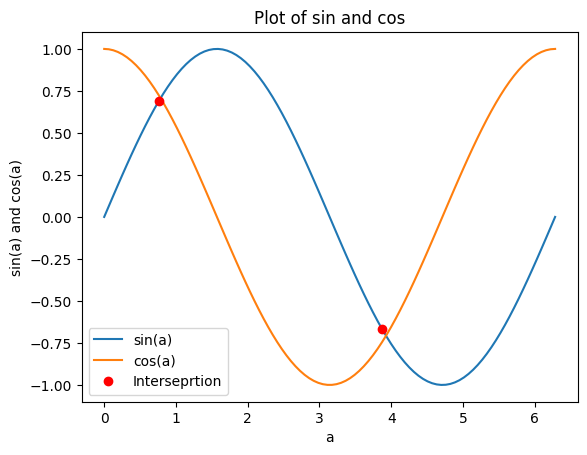

In [4]:
# create an array of 100 numbers
a = np.linspace(0, 2*(math.pi), 100)
#print(a)

# Extract every 10th element using the slice notation
a_ext = a[0::10]
print(a_ext)

# Reverse the array using the slice notation
a_rev = a_ext[::-1]
print(a_rev)

# Extract elements where the absolute difference between the sin and cos functions evaluated for that element is < 0.1
diff = lambda x: 0 if( abs( math.sin(x) - math.cos(x) ) >= 0.1 ) else x
diff_vec = np.vectorize(diff, otypes=[float])

a_func = diff_vec(a)
#print(a_func)
a_fil = np.extract( a_func > 0, a_func)
print(a_fil)

x = a
y = np.sin(a)
z = np.cos(a)
plt.plot(x,y,x,z)
idx = np.argwhere(np.diff(np.sign(y - z))).flatten()
plt.plot(x[idx], y[idx], 'ro')
plt.xlabel('a')  # string must be enclosed with quotes '  '
plt.ylabel('sin(a) and cos(a)')
plt.title('Plot of sin and cos')
plt.legend(['sin(a)', 'cos(a)', 'Interseprtion'])      # legend entries as seperate strings in a list
plt.show()


5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [21]:
dim = 10
step = 1

# set the first element
el1 = 1

mul_vec = [(i*j) for i in range(el1, dim + el1, step) for j in (range(el1, dim+ el1, step))]
mul_temp = np.asarray(mul_vec)
shape = (int(dim/step), int(dim/step))
m = mul_temp.reshape(shape)
print(m)

# (a)
tr = m.trace()
print(tr)

# (b)
# Matrix to array
arr = np.array(m)
# Find the antidiagonal: flip array and then find the diag
antid = np.fliplr(arr).diagonal()
print(antid)

# (c)
diag_off = [m[i,i+1] for i in range(0, int(dim/step) -1, 1) ]
print(diag_off)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
385
[10 18 24 28 30 30 28 24 18 10]
[2, 6, 12, 20, 30, 42, 56, 72, 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [22]:
x = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

#Build a 2D grid of distances 
grid = np.absolute(np.tile(x, (x.size, 1)) - np.transpose(np.tile(x, (x.size, 1))))
print(grid)

# Convert distances in km (cast to int for a better output)
gridKm = np.int64(grid * 1.609344)
print(gridKm)


[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
[[   0  318  487 1184 1401 1890 2373 2484 3078 3939]
 [ 318    0  168  865 1083 1572 2055 2166 2760 3621]
 [ 487  168    0  696  914 1403 1886 1997 2591 3452]
 [1184  865  696    0  217  706 1189 1300 1894 2755]
 [1401 1083  914  217    0  489  972 1083 1676 2537]
 [1890 1572 1403  706  489    0  482  593 1187 2048]
 [2373 2055 1886 1189  972  482    0  111  704 1565]
 [2484 2166 1997 1300 1083  593  111    0  593 1454]
 [3078 2760 2591 1894 1676 1187  704  593    

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [8]:
start = time.process_time()
N=1000

num = np.arange(1, N)
def is_prime(n):
    if n % 2 == 0 and n > 2: 
        return True
    return not(all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2)))

is_prime_vec = np.vectorize(is_prime, otypes=[int])
m = is_prime_vec(num)
print(m)
num_fil=np.ma.array(num, mask=m)
print(num_fil) 
print(time.process_time() - start)

start = time.process_time()
# sieve of Eratosthenes
def sieve(n):
    # Initialize primary list:
    a = [True] * n    
    a[0] = a[1] = False
    for (i, isprime) in enumerate(a):
        if isprime:
            yield i
            # Mark non-prime
            for j in range(i*i, n, i):
                a[j] = False
print(list(sieve(N)))
print(time.process_time() - start)

[0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 

8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

[[ 1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1  1 -1]
 [-1  1 -1 ... -1 -1  1]
 ...
 [-1  1  1 ... -1  1 -1]
 [-1  1 -1 ...  1  1 -1]
 [-1 -1 -1 ...  1 -1  1]]
[[  1   0  -1 ...  12  11  12]
 [ -1  -2  -3 ... -16 -15 -16]
 [ -1   0  -1 ... -16 -17 -16]
 ...
 [ -1   0   1 ...   6   7   6]
 [ -1   0  -1 ...   4   5   4]
 [ -1  -2  -3 ... -34 -35 -34]]
[[   1    0    1 ...  144  121  144]
 [   1    4    9 ...  256  225  256]
 [   1    0    1 ...  256  289  256]
 ...
 [   1    0    1 ...   36   49   36]
 [   1    0    1 ...   16   25   16]
 [   1    4    9 ... 1156 1225 1156]]
[   5.      9.78   14.8    19.9    23.8    28.     32.44   38.72   43.52
   49.06   53.24   58.86   64.72   69.36   75.08   78.72   84.8    88.28
   94.12   99.82  107.2   112.42  115.24  118.78  127.28  132.12  138.6
  141.9   143.32  150.56  156.04  159.04  166.96  174.2   180.84  188.32
  194.92  198.76  203.88  207.6   215.    221.86  217.68  221.58  226.16
  233.74  235.84  241.7   248.    249.44  254.84  263.24  26

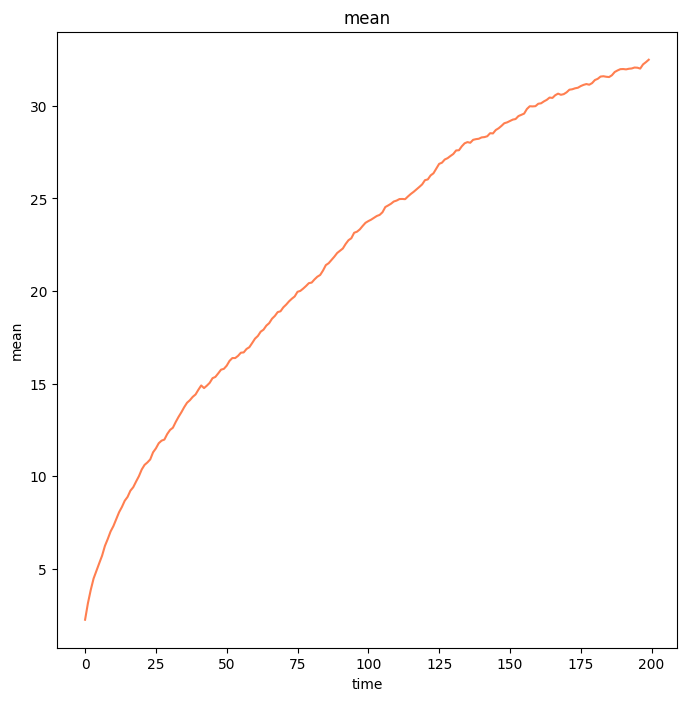

In [6]:
w = 1000
s = 200

# Take 1000 walkers and let them walk for 200 steps Use randint to create a 2D array of size  with values -1 or 1
a = np.random.randint(2, size=(w, s))*2 - 1

print(a)

# Calculate the walking distances for each walker (e.g. by summing the elements in each row)
wd = np.cumsum(a,axis=1)
print(wd)

#Take the square of the previously-obtained array (element-wise)
asq = np.power(wd, 2)
print(asq)

# Compute the mean of the squared distances at each step (i.e. the mean along the columns)
sqdist = np.sum(asq,axis=0) / s
print(sqdist)

# plot the average distances ((⎯⎯√𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒2)) as a function of time (step)
mean = np.sqrt(sqdist)
time = np.arange(len(mean))

fig1 = plt.figure(num="Figure 1", figsize=(8, 8))
plt.plot( mean, color='coral')
plt.title('mean')
plt.xlabel("time")
plt.ylabel("mean")
plt.show()